<a href="https://colab.research.google.com/github/yashmankar1120/OIBSIP/blob/main/TASK_2/OIBSIP_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK-2**
Yash Mankar
[yashmankar1120@gmail.com]

#**UNEMPLOYMENT ANALYSIS WITH PYTHON**
Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

Dataset:https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

In [ ]:
#Mounting Drive to retrive dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Required Libraries for Visualization
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
import geopandas as gpd
import plotly.express as px

In [ ]:
#Unemployment data of India
df = pd.read_csv('/content/drive/MyDrive/OIBSIP/Unemployment_in_India.csv')          
#Unemployment data during Covid-19
df_c = pd.read_csv('/content/drive/MyDrive/OIBSIP/Unemployment_Covid_19.csv') 

In [ ]:
#Displaying Datasets
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df_c.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
#Preprocessing

#Checking NUll Values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df.dropna()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


#**Exploratory Data Analysis  (EDA)**

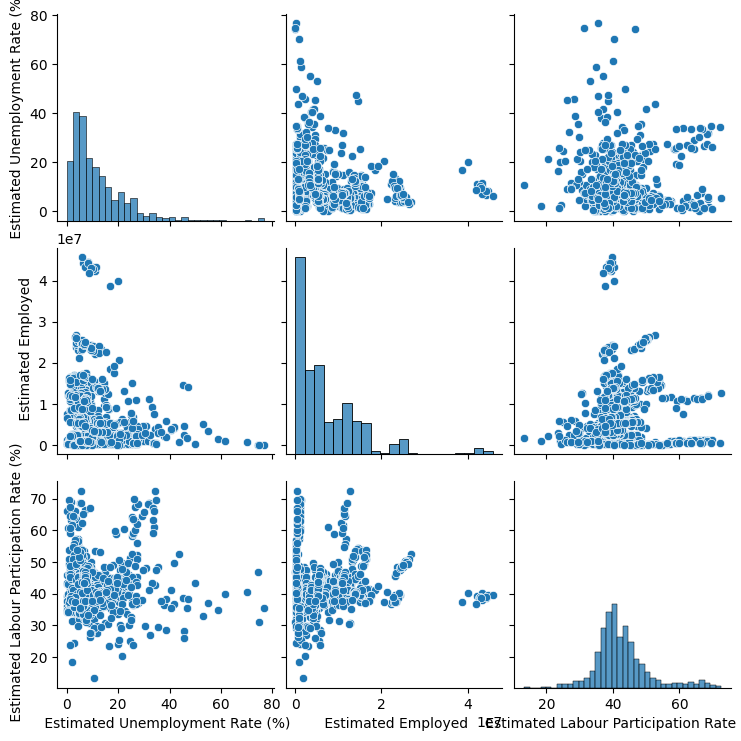

In [ ]:
#PAIRPLOT
sns.pairplot(df)

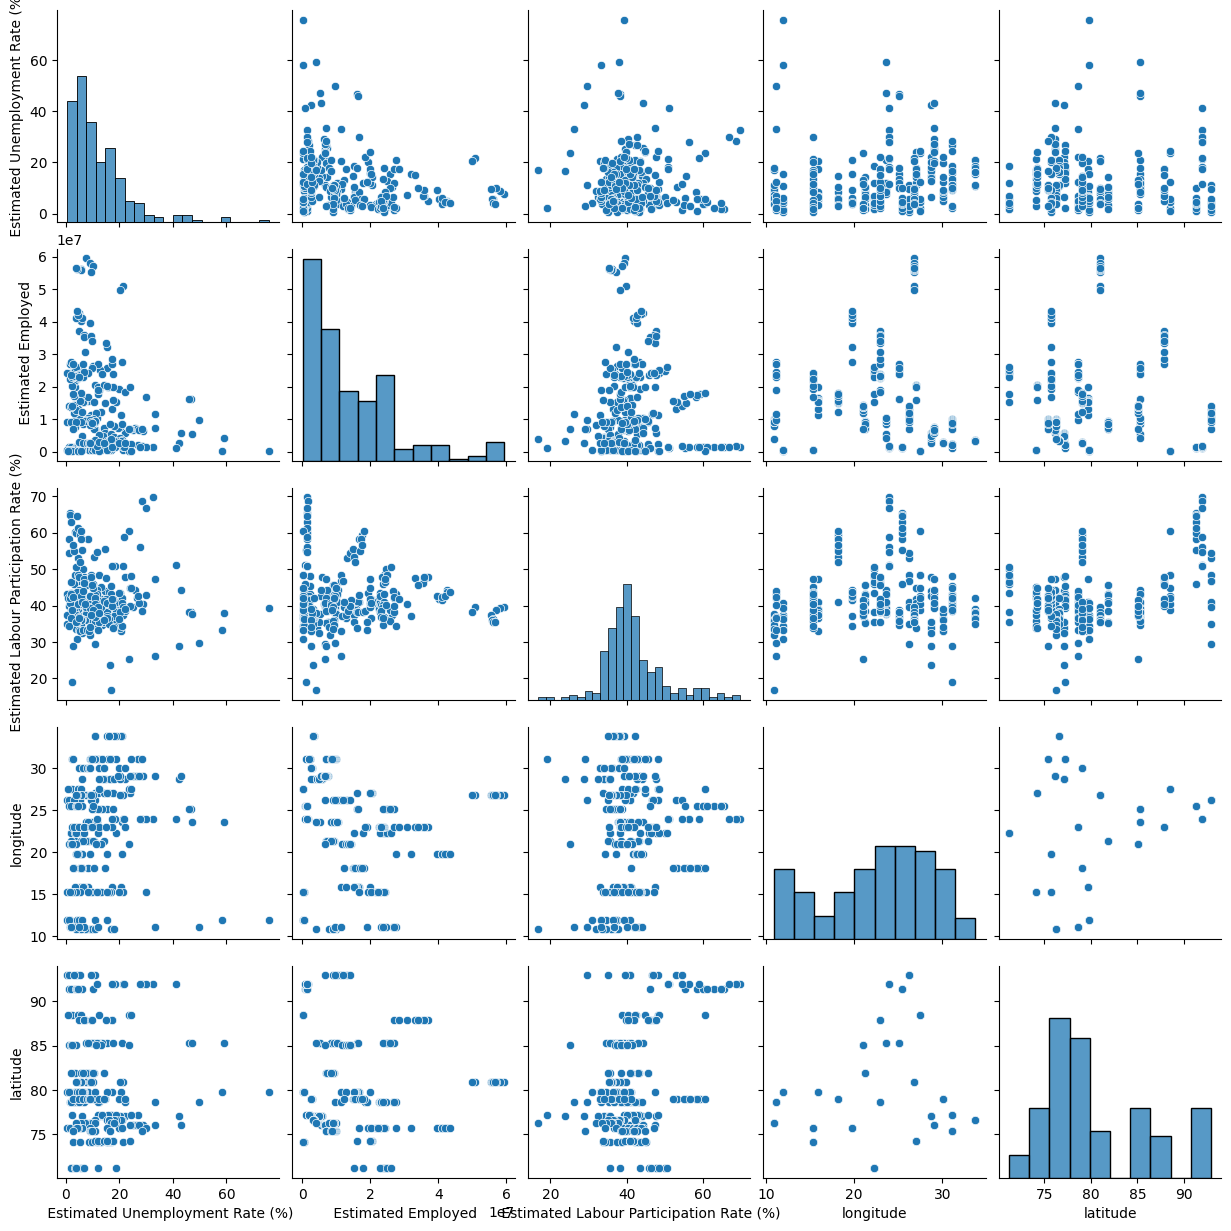

In [ ]:
sns.pairplot(df_c)

<ipython-input-12-7016a0021d4c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data = df.groupby('Region').sum()


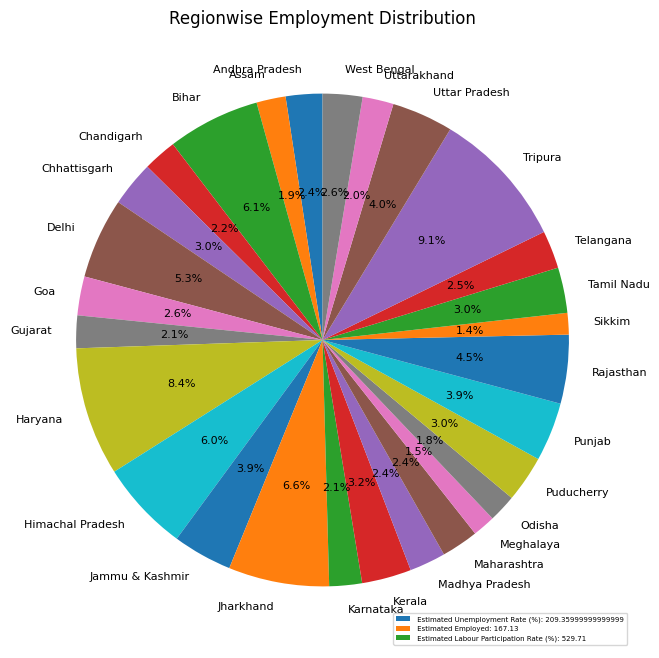

In [ ]:
#Regionwise Employment Distribution(Pieplot)
region_data = df.groupby('Region').sum()
fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(region_data[' Estimated Unemployment Rate (%)'], labels=region_data.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
ax.legend(loc='lower right', labels=[f'{l}: {s}' for l, s in zip(region_data, region_data[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Regionwise Employment Distribution')
plt.show()

<ipython-input-13-5d6c4534b05e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data = df_c.groupby('Region').sum()


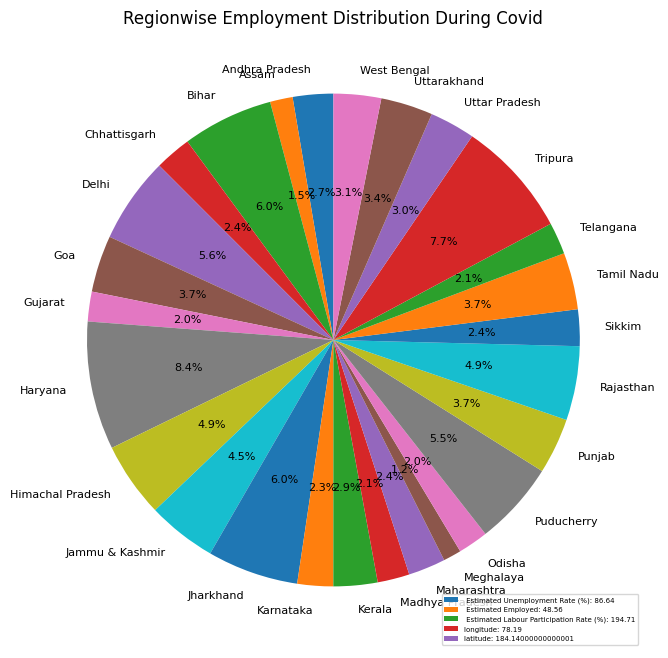

In [ ]:
region_data = df_c.groupby('Region').sum()
fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(region_data[' Estimated Unemployment Rate (%)'], labels=region_data.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
ax.legend(loc='lower right', labels=[f'{l}: {s}' for l, s in zip(region_data, region_data[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Regionwise Employment Distribution During Covid')
plt.show()

<ipython-input-14-c2adc2950303>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = df_c.groupby(["Region", " Date"]).sum()


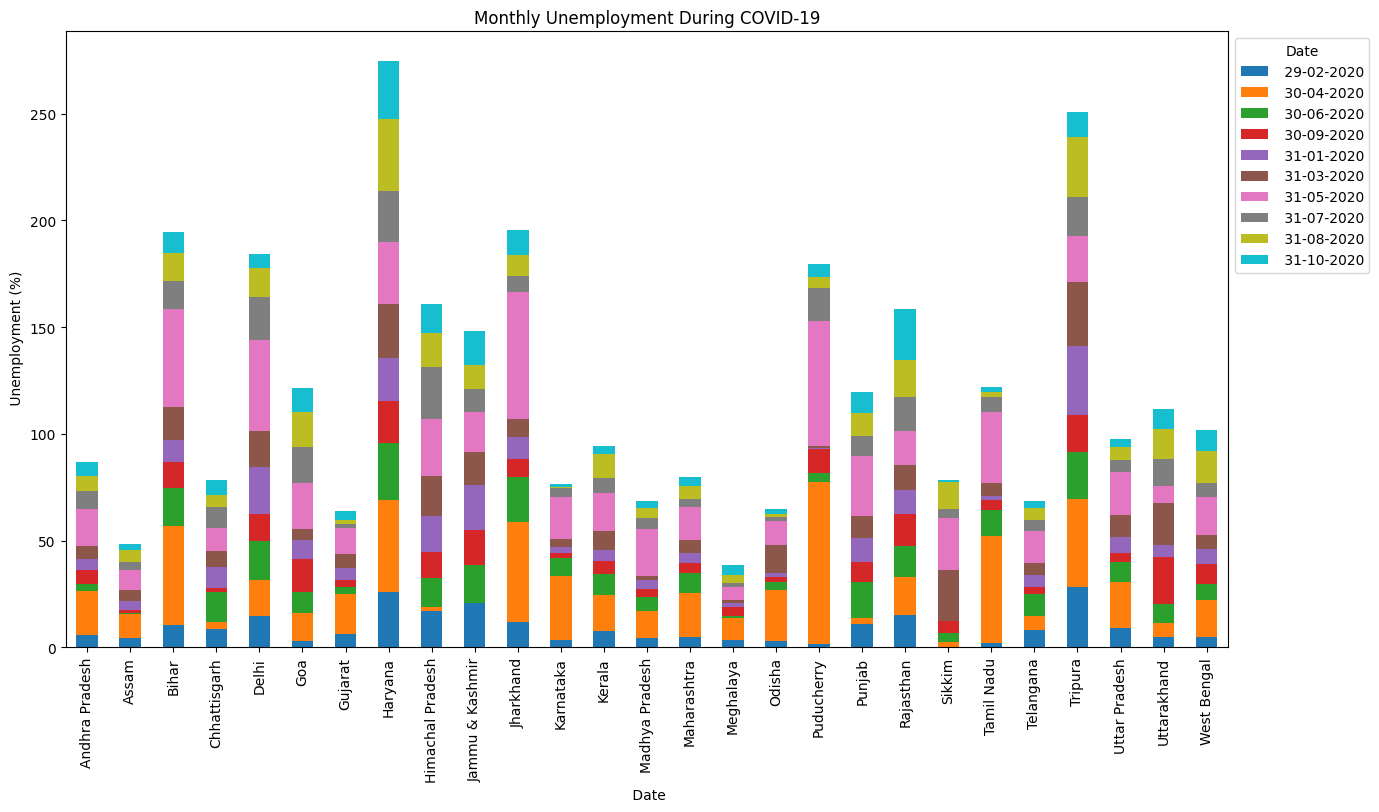

In [ ]:
#Monthly Unemployment During COVID-19
grouped_df1 = df_c.groupby(["Region", " Date"]).sum()
fig, ax = plt.subplots(figsize=(15,8))
grouped_df1[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)
ax.set_ylabel(" Unemployment (%)")
ax.set_xlabel(" Date")
plt.title('Monthly Unemployment During COVID-19')
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))
plt.show()

<ipython-input-15-d9ebb28e25ad>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data1 = df_c.groupby('Region').sum()


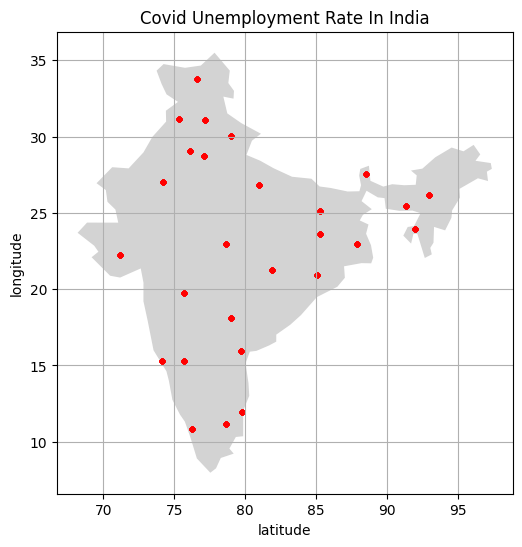

In [ ]:
#Plotting Geographic Maps
fig, ax = plt.subplots(figsize=(8, 6))

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "India"].plot(color="lightgrey", ax=ax)

first_month = df_c[" Estimated Employed"].min()
last_month = df_c[" Estimated Employed"].max()
region_data1 = df_c.groupby('Region').sum()

df_c.plot(x="latitude", y="longitude", kind="scatter",c='r',
        title=f"Covid Unemployment Rate In India",
        ax=ax, s=10)

ax.grid(visible=True, alpha=1)
plt.show()

<ipython-input-16-01ed3beaa66a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds1 = df.corr()


<Axes: >

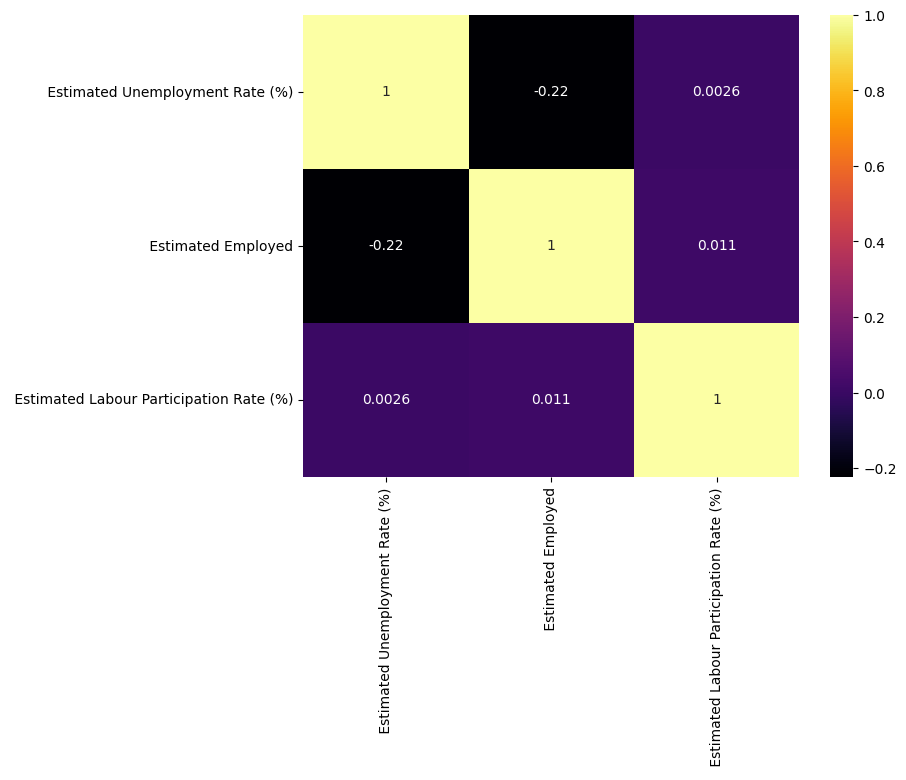

In [ ]:
#Heatmaps
plt.figure(figsize=(8,6))
ds1 = df.corr()
sns.heatmap(ds1, annot=True, cmap='inferno')

<ipython-input-17-f24838cc2f47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds1 = df_c.corr()


<Axes: >

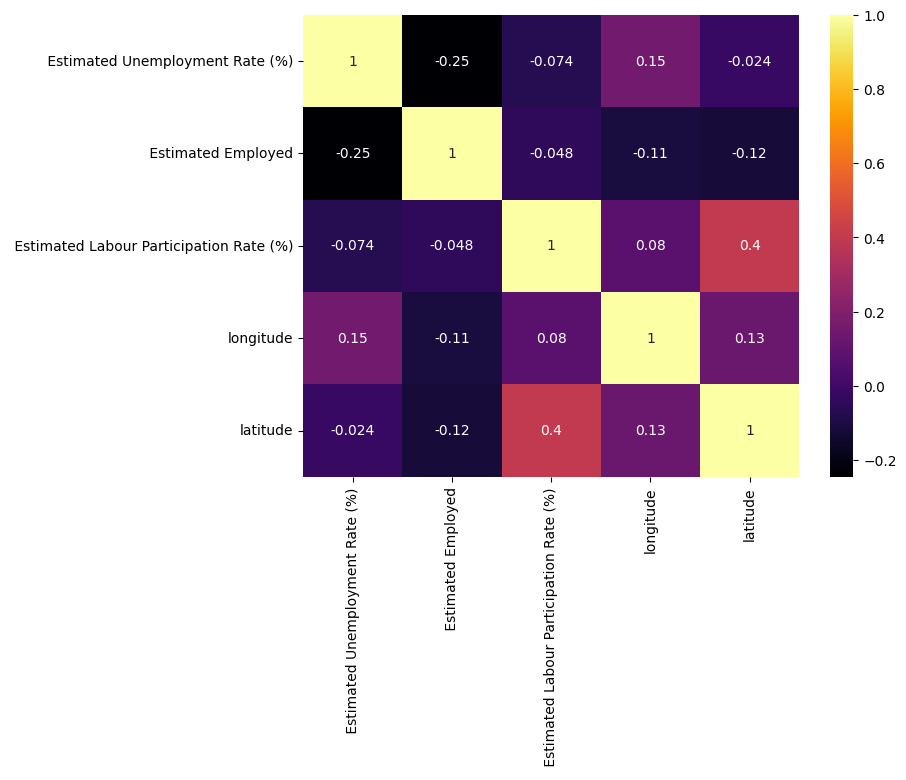

In [ ]:
plt.figure(figsize=(8,6))
ds1 = df_c.corr()
sns.heatmap(ds1, annot=True, cmap='inferno')

In [ ]:
#Boxplot
fg = px.box(df,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate',animation_frame=' Date',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [ ]:
fg = px.box(df_c,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate',animation_frame=' Date',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [ ]:
#Scatterplot
fg = px.scatter(df_c,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate',animation_frame=' Date',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()